Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv 
dataset. Determine the number of clusters using the elbow method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('sales_data_sample.csv', sep=',', encoding='latin-1')

# Display the first few rows of the dataset
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
print(df.isnull().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [4]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATUS', 'POSTALCODE', 'CITY', 
                      'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 
                      'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']

df = df.drop(df_drop, axis=1)

df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [5]:
# One-hot encode categorical variables
df = pd.concat([df, 
                 pd.get_dummies(df['PRODUCTLINE'], prefix='PRODUCTLINE'),
                 pd.get_dummies(df['DEALSIZE'], prefix='DEALSIZE')], axis=1)

In [6]:
# Drop original categorical columns
df = df.drop(columns=['COUNTRY', 'PRODUCTLINE', 'DEALSIZE'])

In [7]:
df['PRODUCTCODE'] = df['PRODUCTCODE'].astype('category').cat.codes
df = df.drop(columns=['ORDERDATE'])

## Plotting the Elbow Plot to determine the number of clusters.

In [8]:
from sklearn.cluster import KMeans

distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

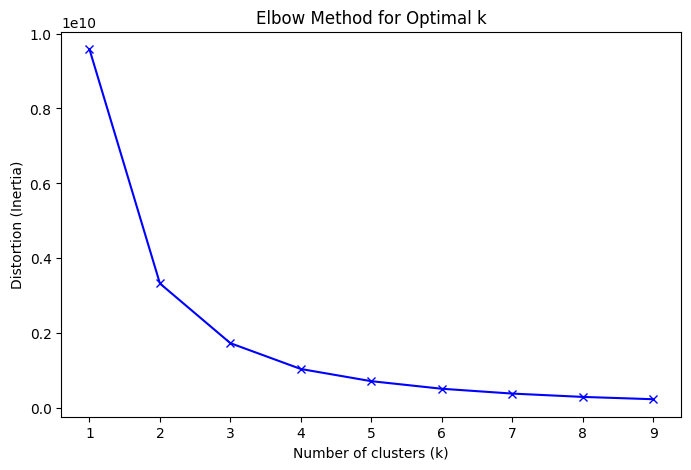

In [9]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [11]:
# Choose k=3 based on elbow curve, fit the model, and get predictions
kmeans_final = KMeans(n_clusters=3, random_state=2)

y_kmeans = kmeans_final.fit_predict(df)

# Add cluster labels to the original dataset
df['Cluster'] = y_kmeans

# Show cluster counts
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:\n", cluster_counts)

Cluster Counts:
 Cluster
0    1344
2    1081
1     398
Name: count, dtype: int64


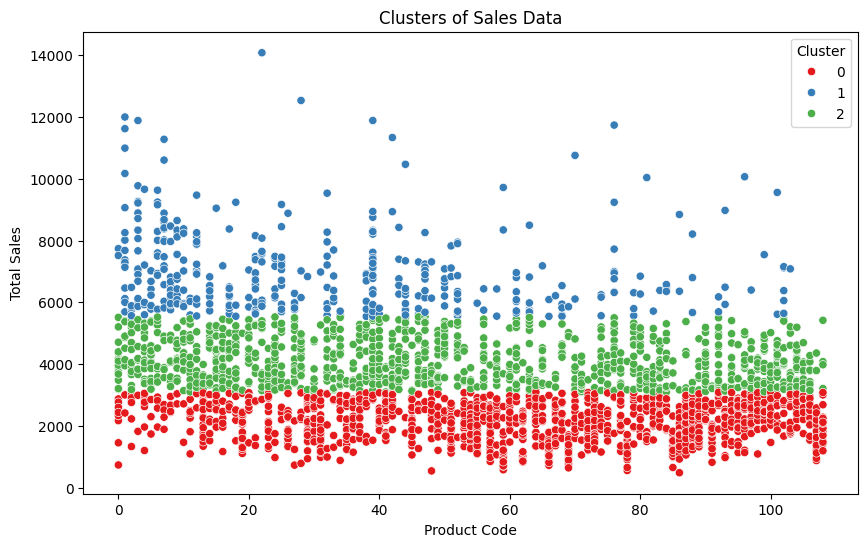

Cluster Centers:
 [[ 3.07723214e+01  6.97585491e+01  6.65178571e+00  2.10716933e+03
   2.71354167e+00  7.08184524e+00  2.00381696e+03  7.81674107e+01
   6.25811012e+01  2.62648810e-01  1.21279762e-01  1.28720238e-01
   1.01190476e-01  3.79464286e-02  9.30059524e-02  2.55208333e-01
   2.08166817e-17  4.61309524e-02  9.53869048e-01]
 [ 4.44623116e+01  9.98998241e+01  5.77135678e+00  7.00029073e+03
   2.70100503e+00  7.03015075e+00  2.00387688e+03  1.44356784e+02
   3.23869347e+01  5.35175879e-01  1.03015075e-01  7.03517588e-02
   2.01005025e-02  1.25628141e-02  1.28140704e-01  1.30653266e-01
   3.94472362e-01  6.05527638e-01 -2.10942375e-15]
 [ 3.70148011e+01  9.49606383e+01  6.49121184e+00  4.08369802e+03
   2.72895467e+00  7.12858464e+00  2.00379001e+03  1.12681776e+02
   5.06965772e+01  3.70952821e-01  1.17483811e-01  9.71322849e-02
   8.32562442e-02  1.94264570e-02  1.15633673e-01  1.96114709e-01
   2.08166817e-17  1.00000000e+00 -3.44169138e-15]]


In [12]:
# Visualizing the clusters with selected features (adjust 'Feature1' and 'Feature2' accordingly)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PRODUCTCODE', y='SALES', hue='Cluster', palette='Set1')  # Replace with appropriate features
plt.title('Clusters of Sales Data')
plt.xlabel('Product Code')  # Replace with the actual feature name used on the x-axis
plt.ylabel('Total Sales')  # Replace with the actual feature name used on the y-axis
plt.legend(title='Cluster')
plt.show()

# Print the coordinates of the cluster centers
print("Cluster Centers:\n", kmeans_final.cluster_centers_)
